In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [19]:
data = pd.read_csv(r'Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Basic statistics

In [11]:
print("Basic Statistics:")
print(data.describe())

Basic Statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Distribution of churn

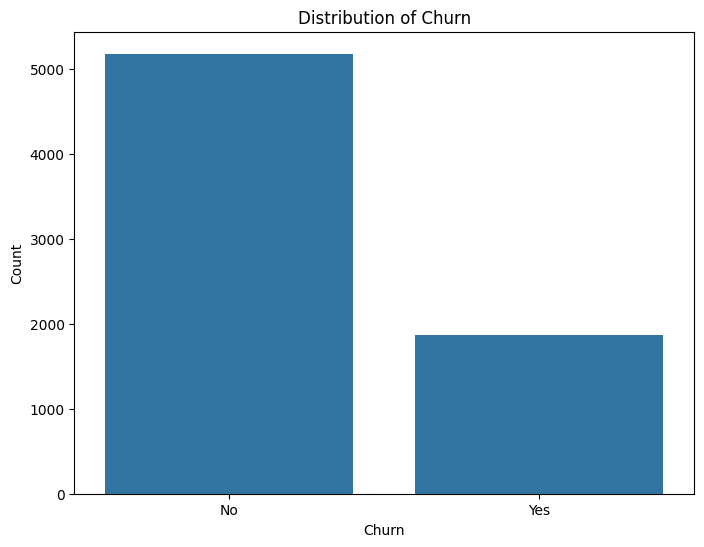

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


# Distribution of numeric features

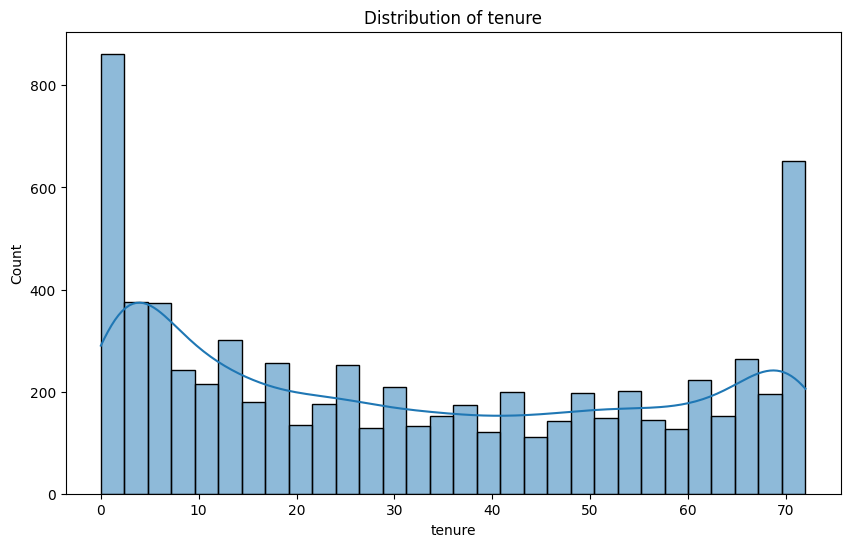

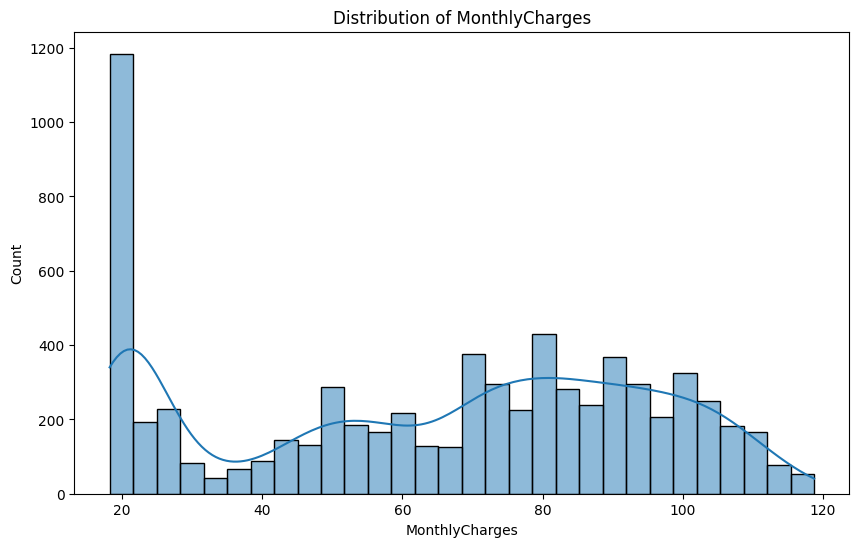

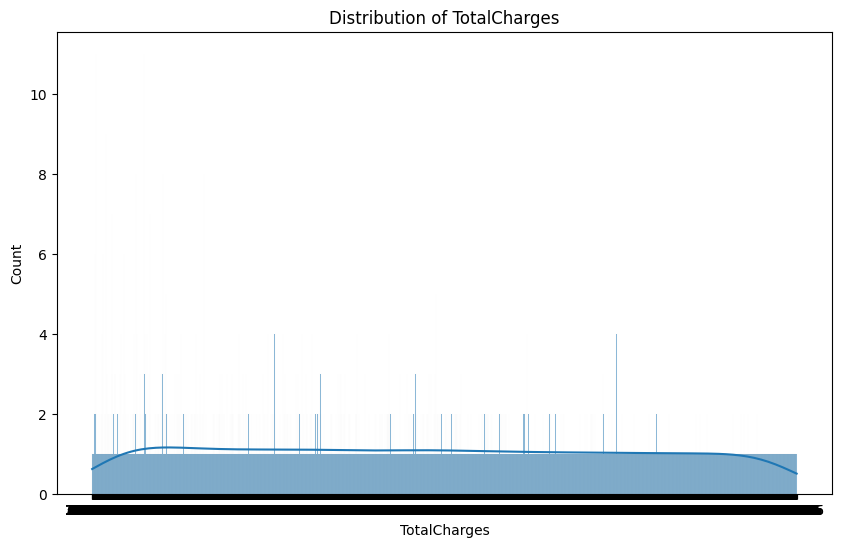

In [14]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Convert non-numeric columns to categorical codes for correlation matrix & Correlation matrix 

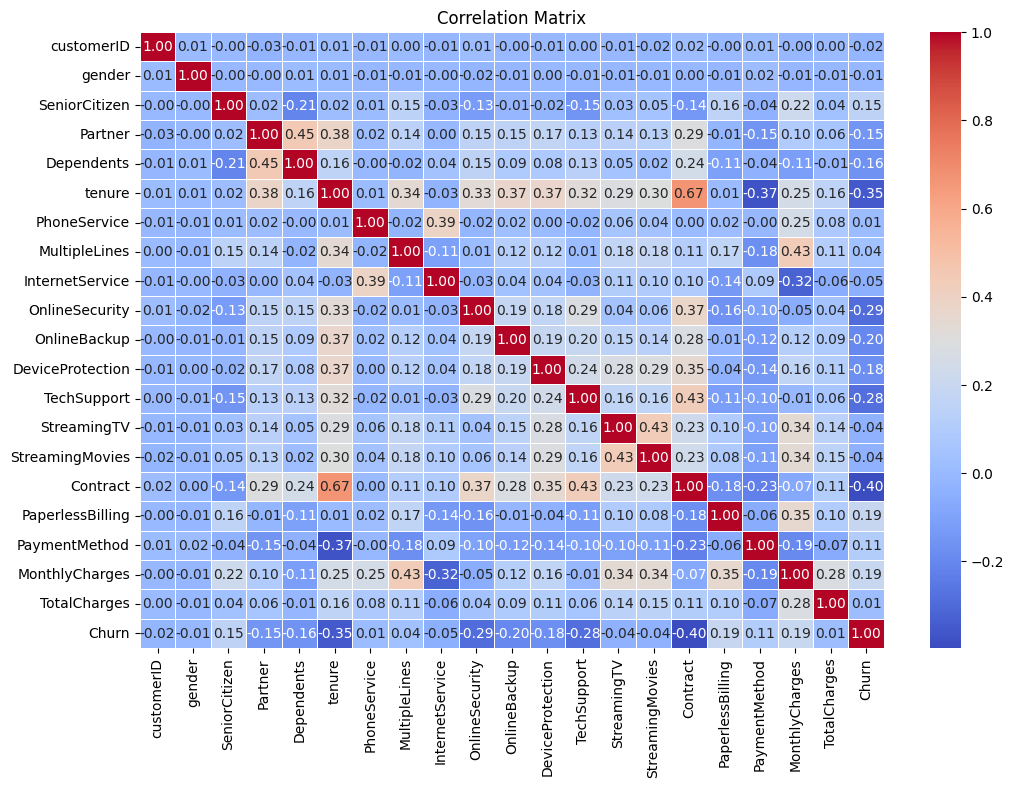

In [17]:
data_encoded = data.copy()
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

plt.figure(figsize=(12, 8))
corr = data_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



# Categorical feature distributions by churn

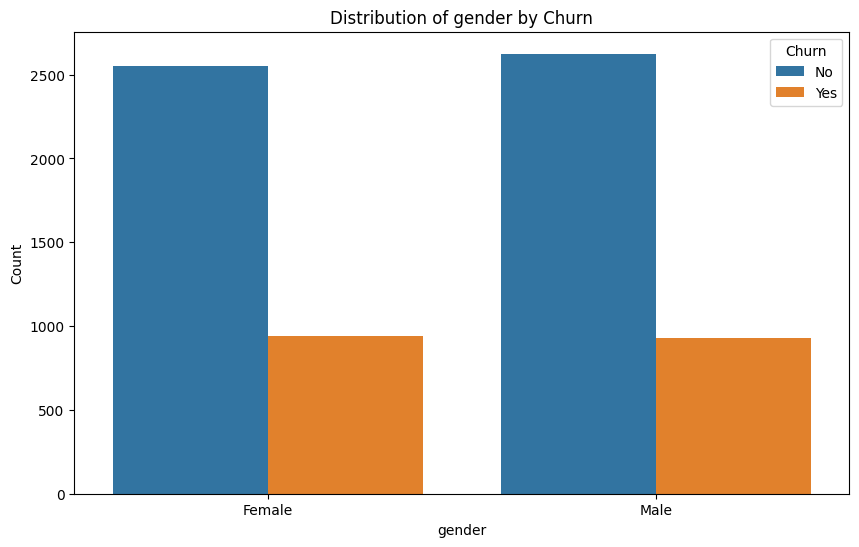

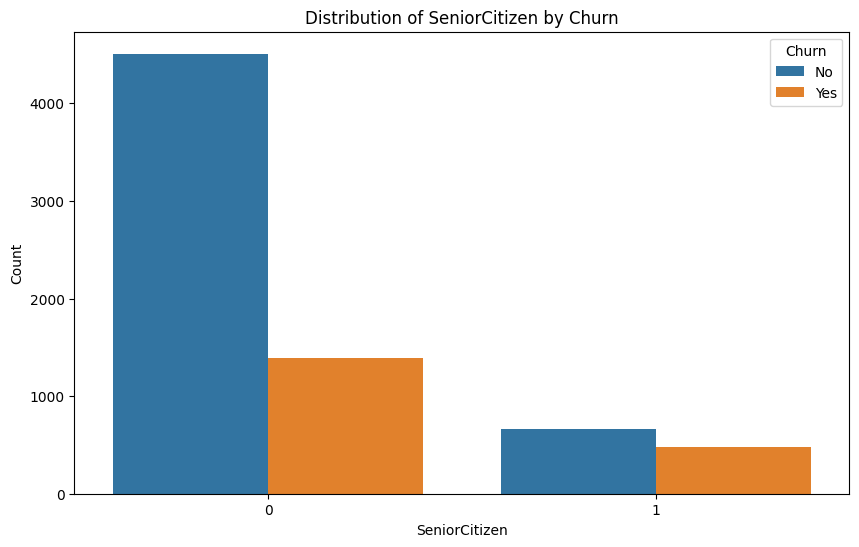

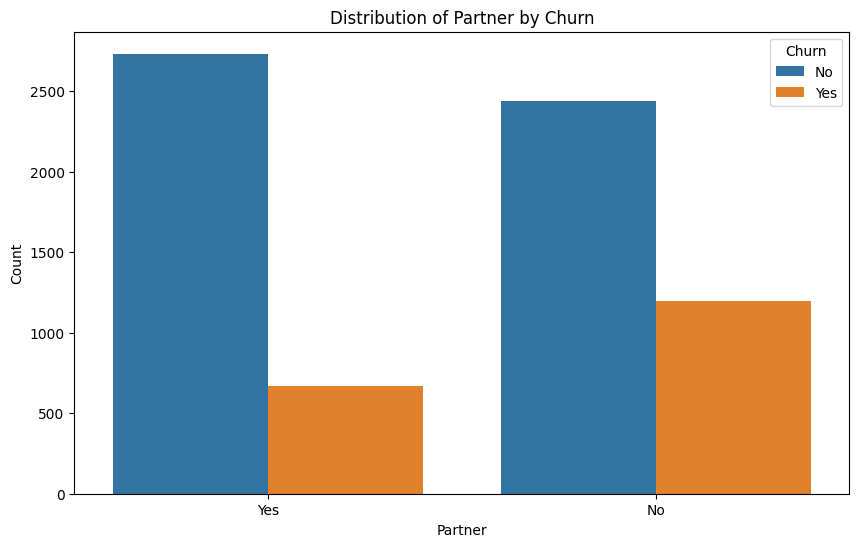

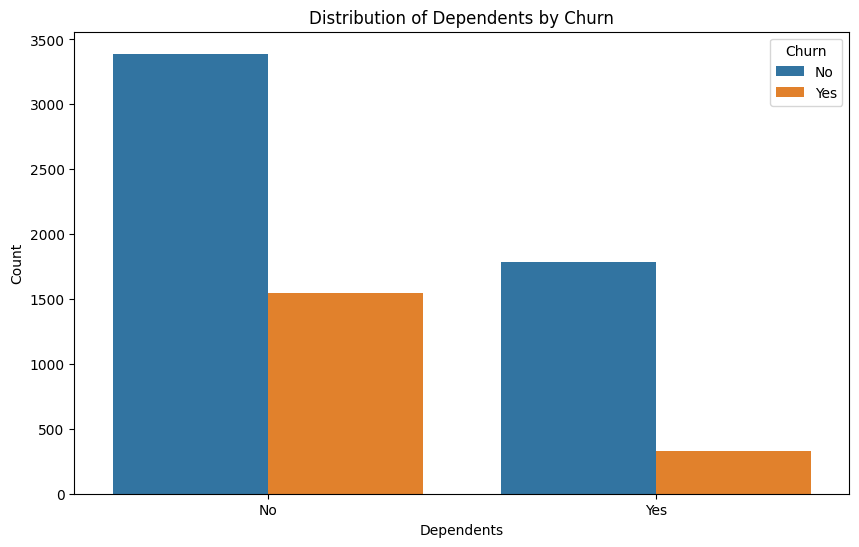

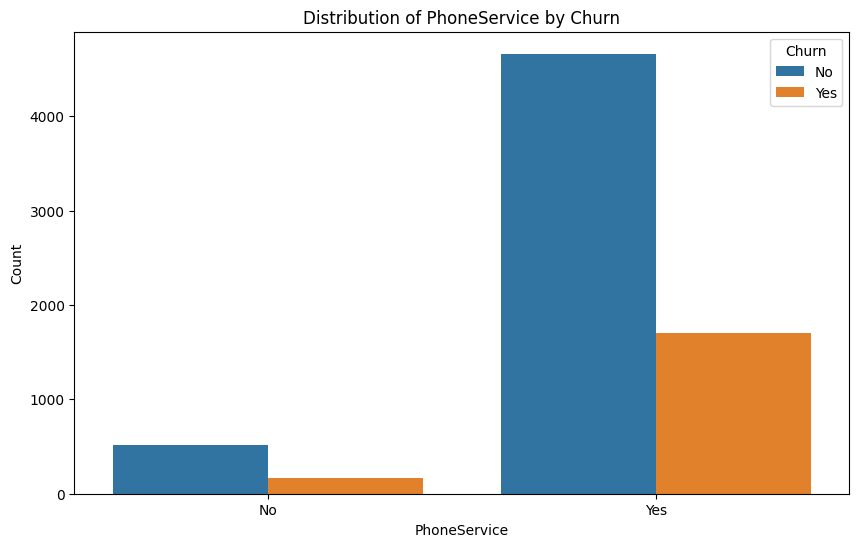

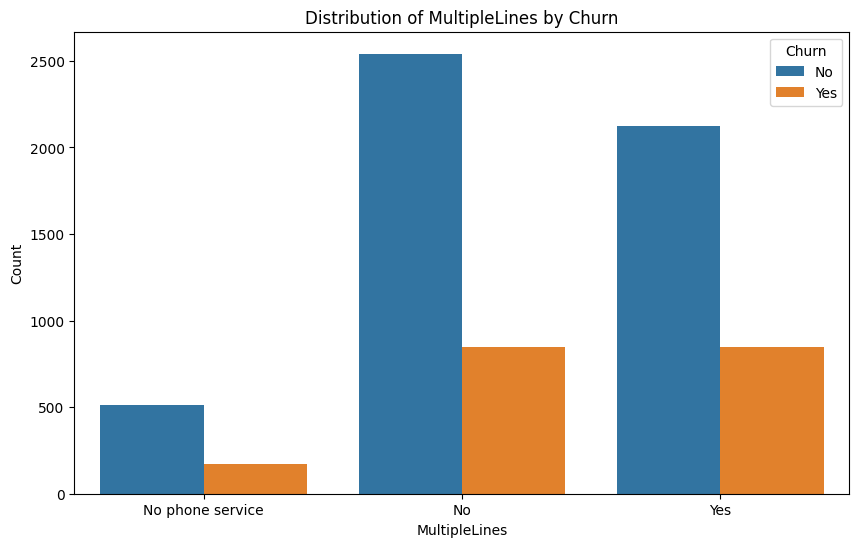

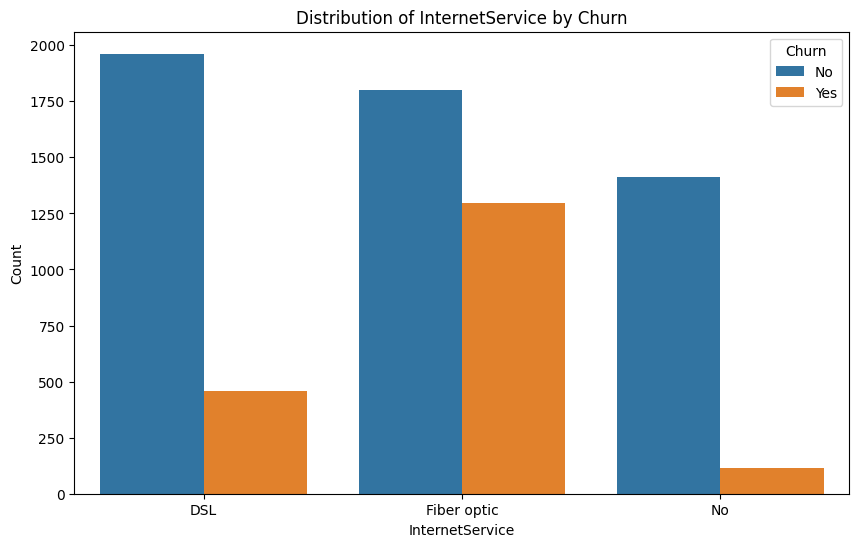

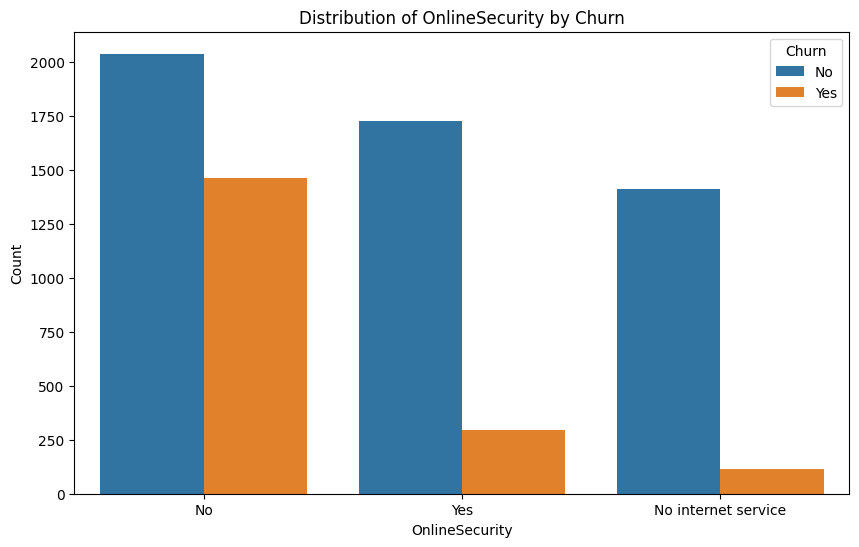

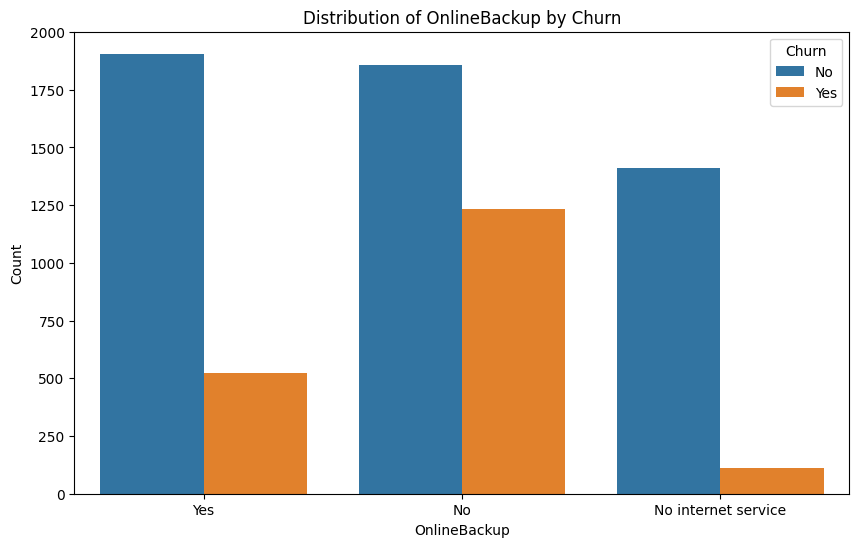

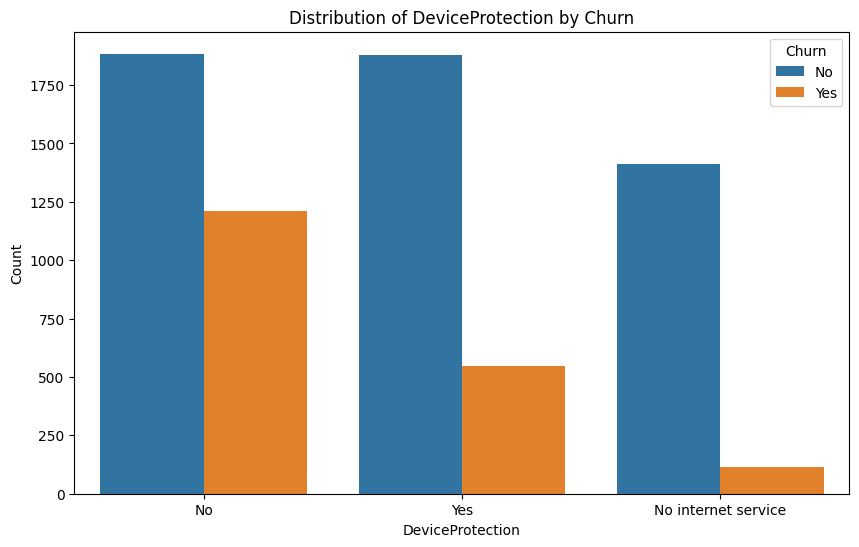

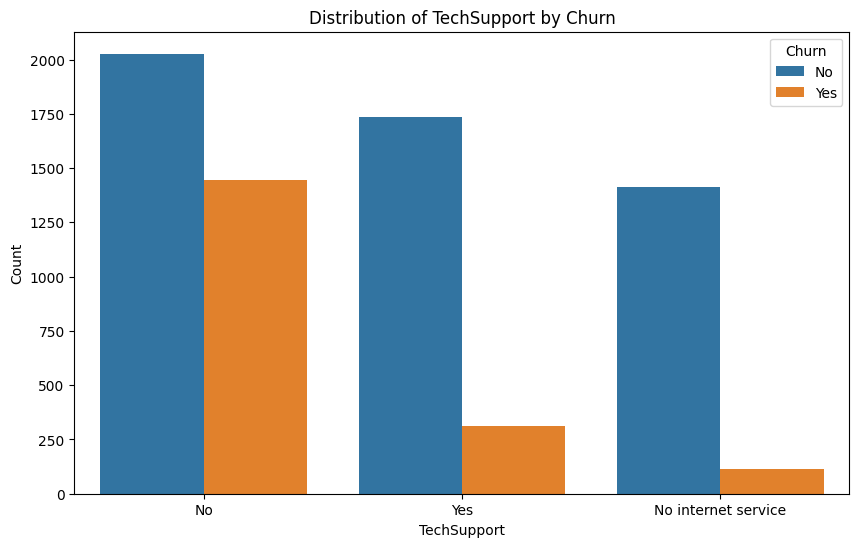

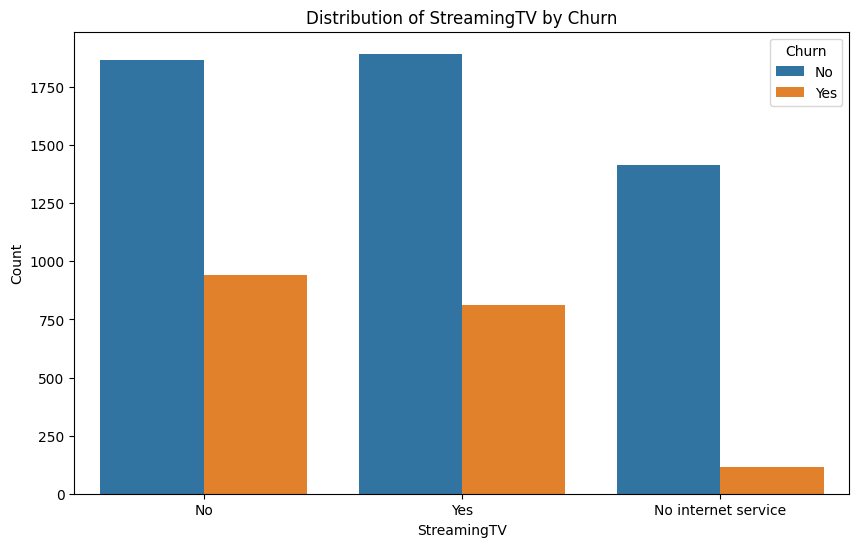

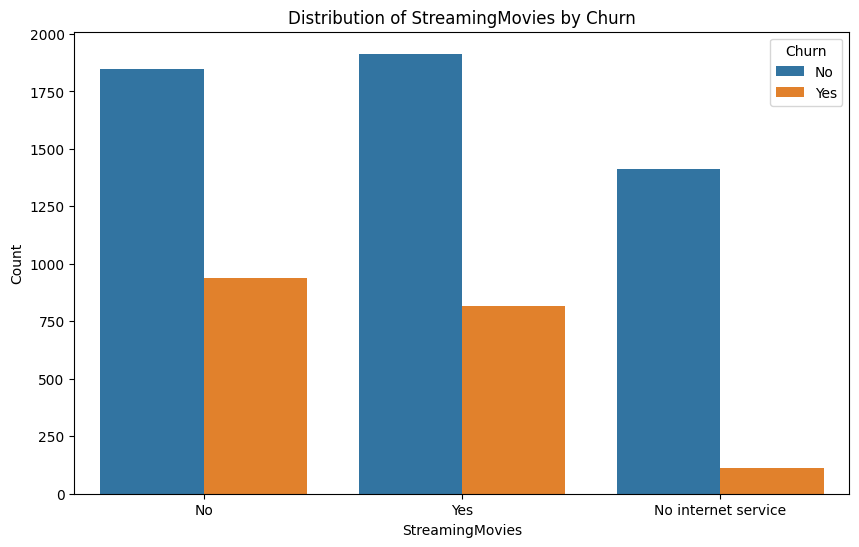

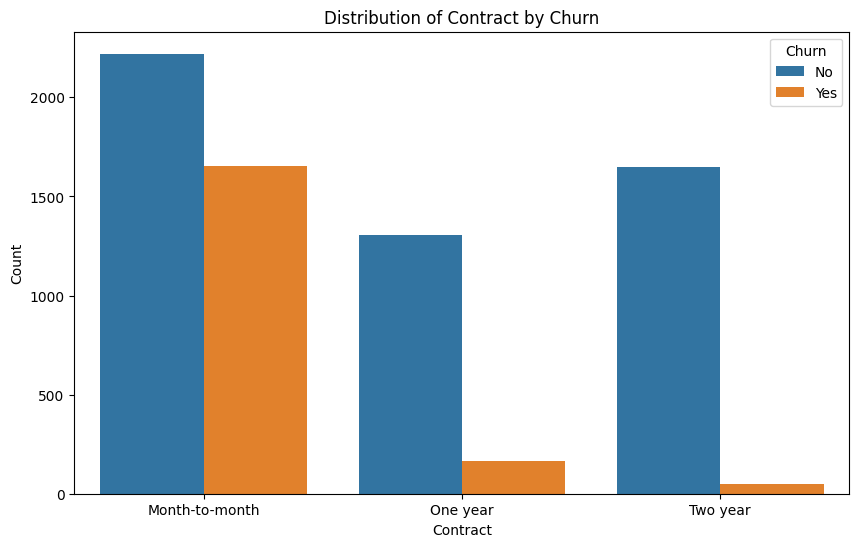

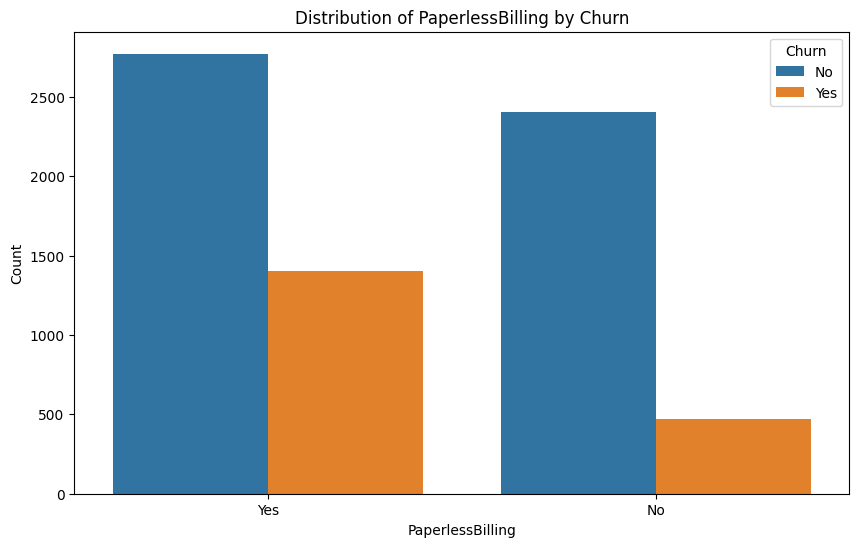

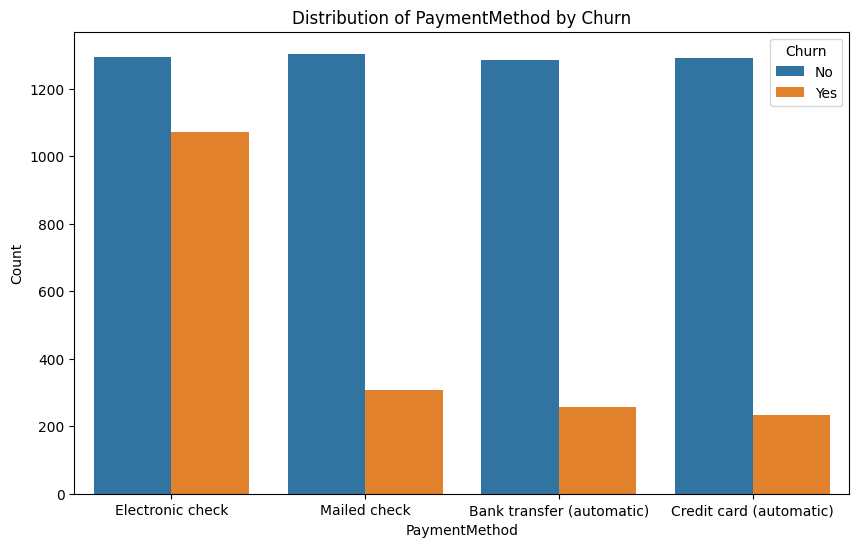

In [18]:

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.show()
